# Cleaning US Census Data



   Using `glob`, loop through the census files available and load them into DataFrames. Then, concatenate all of those DataFrames together into one DataFrame, called something like `us_census`.

In [396]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

files = glob.glob('states*.csv')
df_list = []
for filename in files:
    data = pd.read_csv(filename)
    df_list.append(data)

us_census = pd.concat(df_list)    


Inspecting data types and columns 

In [397]:
us_census.columns
us_census.dtypes


Unnamed: 0     int64
State         object
TotalPop       int64
Hispanic      object
White         object
Black         object
Native        object
Asian         object
Pacific       object
Income        object
GenderPop     object
dtype: object

Look at the `head()` of the DataFrame so that you can understand why some of these `dtypes` are objects instead of integers or floats.

   Start to make a plan for how to convert these columns into the right types for manipulation.

In [398]:
us_census.head(10)


,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,0,Alabama,4830620,3.75%,61.88%,31.25%,0.45%,1.05%,0.03%,"$43,296.36",2341093M_2489527F
1,1,Alaska,733375,5.91%,60.91%,2.85%,16.39%,5.45%,1.06%,"$70,354.74",384160M_349215F
2,2,Arizona,6641928,29.57%,57.12%,3.85%,4.36%,2.88%,0.17%,"$54,207.82",3299088M_3342840F
3,3,Arkansas,2958208,6.22%,71.14%,18.97%,0.52%,1.14%,0.15%,"$41,935.63",1451913M_1506295F
4,4,California,38421464,37.29%,40.22%,5.68%,0.41%,13.05%,0.35%,"$67,264.78",19087135M_19334329F
5,5,Colorado,5278906,20.78%,69.90%,3.55%,0.57%,2.66%,NaN,"$64,657.80",2648667M_2630239F
0,0,Colorado,5278906,20.78%,69.90%,3.55%,0.57%,2.66%,NaN,"$64,657.80",2648667M_2630239F
1,1,Connecticut,3593222,15.60%,67.68%,10.35%,0.13%,4.02%,0.02%,"$76,146.56",1751607M_1841615F
2,2,Delaware,926454,8.82%,64.63%,20.74%,0.26%,3.27%,NaN,"$61,827.98",448413M_478041F
3,3,District of Columbia,647484,9.17%,33.10%,51.78%,0.20%,3.38%,0.03%,"$75,466.36",306674M_340810F


## Regex to the Rescue

Use regex to turn the `Income` column into a format that is ready for conversion into a numerical type.

In [399]:
#removing the dollar sign in income
us_census['Income'] = us_census['Income'].str.replace('[\$,]', '', regex=True)
us_census.head()

<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
C:\Users\cheng\AppData\Local\Temp\ipykernel_28956\3667405767.py:2: SyntaxWarning: invalid escape sequence '\$'
  us_census['Income'] = us_census['Income'].str.replace('[\$,]', '', regex=True)


,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,0,Alabama,4830620,3.75%,61.88%,31.25%,0.45%,1.05%,0.03%,43296.36,2341093M_2489527F
1,1,Alaska,733375,5.91%,60.91%,2.85%,16.39%,5.45%,1.06%,70354.74,384160M_349215F
2,2,Arizona,6641928,29.57%,57.12%,3.85%,4.36%,2.88%,0.17%,54207.82,3299088M_3342840F
3,3,Arkansas,2958208,6.22%,71.14%,18.97%,0.52%,1.14%,0.15%,41935.63,1451913M_1506295F
4,4,California,38421464,37.29%,40.22%,5.68%,0.41%,13.05%,0.35%,67264.78,19087135M_19334329F


Look at the `GenderPop` column. We are going to want to separate this into two columns, the `Men` column, and the `Women` column.

   Split the column into those two new columns using `str.split` and separating out those results.

In [400]:
gender_split = us_census['GenderPop'].str.split('_')
us_census['male pop'] = gender_split.str.get(0)
us_census['female pop'] = gender_split.str.get(1)
us_census.head()


,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,male pop,female pop
0,0,Alabama,4830620,3.75%,61.88%,31.25%,0.45%,1.05%,0.03%,43296.36,2341093M_2489527F,2341093M,2489527F
1,1,Alaska,733375,5.91%,60.91%,2.85%,16.39%,5.45%,1.06%,70354.74,384160M_349215F,384160M,349215F
2,2,Arizona,6641928,29.57%,57.12%,3.85%,4.36%,2.88%,0.17%,54207.82,3299088M_3342840F,3299088M,3342840F
3,3,Arkansas,2958208,6.22%,71.14%,18.97%,0.52%,1.14%,0.15%,41935.63,1451913M_1506295F,1451913M,1506295F
4,4,California,38421464,37.29%,40.22%,5.68%,0.41%,13.05%,0.35%,67264.78,19087135M_19334329F,19087135M,19334329F


Convert both of the columns into numerical datatypes.

Removing `M` and `F` in each entry before we convert.

In [401]:
us_census['male pop'] = us_census['male pop'].str[:-1]
us_census['female pop'] = us_census['female pop'].str[:-1]
us_census['male pop'] = pd.to_numeric(us_census['male pop'])
us_census['female pop'] = pd.to_numeric(us_census['female pop'])
us_census.head()






,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,male pop,female pop
0,0,Alabama,4830620,3.75%,61.88%,31.25%,0.45%,1.05%,0.03%,43296.36,2341093M_2489527F,2341093,2489527.0
1,1,Alaska,733375,5.91%,60.91%,2.85%,16.39%,5.45%,1.06%,70354.74,384160M_349215F,384160,349215.0
2,2,Arizona,6641928,29.57%,57.12%,3.85%,4.36%,2.88%,0.17%,54207.82,3299088M_3342840F,3299088,3342840.0
3,3,Arkansas,2958208,6.22%,71.14%,18.97%,0.52%,1.14%,0.15%,41935.63,1451913M_1506295F,1451913,1506295.0
4,4,California,38421464,37.29%,40.22%,5.68%,0.41%,13.05%,0.35%,67264.78,19087135M_19334329F,19087135,19334329.0


Use matplotlib to make a scatterplot
   


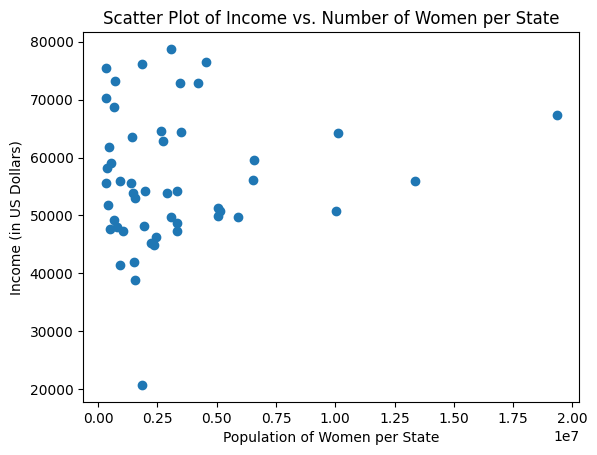

<Figure size 640x480 with 0 Axes>

In [445]:
plt.scatter(us_census['female pop'], us_census['Income'])
plt.title("Scatter Plot of Income vs. Number of Women per State")
plt.xlabel("Population of Women per State")
plt.ylabel("Income (in US Dollars)")
plt.show()
plt.clf()

These monstrous csv files probably have `nan` values in them

We can fill in those `nan`s by using pandas' `.fillna()` function.
   
You have the `TotalPop` per state, and you have the `Men` per state. As an estimate for the `nan` values in the `Women` column, you could use the `TotalPop` of that state minus the `Men` for that state.
   

In [403]:
us_census['female pop'].fillna(value=(us_census['TotalPop'] - us_census['male pop']), inplace=True)


C:\Users\cheng\AppData\Local\Temp\ipykernel_28956\1442885738.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  us_census['female pop'].fillna(value=(us_census['TotalPop'] - us_census['male pop']), inplace=True)


Using `.duplicated()` to check for duplicates

In [404]:
print(us_census.duplicated(subset='State'))

0    False
1    False
2    False
3    False
4    False
5    False
0     True
1    False
2    False
3    False
4    False
5    False
0     True
1    False
2    False
3    False
4    False
5    False
0     True
1    False
2    False
3    False
4    False
5    False
0     True
1    False
2    False
3    False
4    False
5    False
0     True
1    False
2    False
3    False
4    False
5    False
0     True
1    False
2    False
3    False
4    False
5    False
0     True
1    False
2    False
3    False
4    False
5    False
0     True
1    False
2    False
3    False
4    False
5    False
0     True
1    False
2    False
3    False
4    False
5    False
dtype: bool


Drop those duplicates using the `.drop_duplicates()` function.

In [405]:
us_census.drop_duplicates(subset='State')


,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,male pop,female pop
0,0,Alabama,4830620,3.75%,61.88%,31.25%,0.45%,1.05%,0.03%,43296.36,2341093M_2489527F,2341093,2489527.0
1,1,Alaska,733375,5.91%,60.91%,2.85%,16.39%,5.45%,1.06%,70354.74,384160M_349215F,384160,349215.0
2,2,Arizona,6641928,29.57%,57.12%,3.85%,4.36%,2.88%,0.17%,54207.82,3299088M_3342840F,3299088,3342840.0
3,3,Arkansas,2958208,6.22%,71.14%,18.97%,0.52%,1.14%,0.15%,41935.63,1451913M_1506295F,1451913,1506295.0
4,4,California,38421464,37.29%,40.22%,5.68%,0.41%,13.05%,0.35%,67264.78,19087135M_19334329F,19087135,19334329.0
5,5,Colorado,5278906,20.78%,69.90%,3.55%,0.57%,2.66%,NaN,64657.80,2648667M_2630239F,2648667,2630239.0
1,1,Connecticut,3593222,15.60%,67.68%,10.35%,0.13%,4.02%,0.02%,76146.56,1751607M_1841615F,1751607,1841615.0
2,2,Delaware,926454,8.82%,64.63%,20.74%,0.26%,3.27%,NaN,61827.98,448413M_478041F,448413,478041.0
3,3,District of Columbia,647484,9.17%,33.10%,51.78%,0.20%,3.38%,0.03%,75466.36,306674M_340810F,306674,340810.0
4,4,Florida,19645772,21.34%,59.08%,15.17%,0.21%,2.28%,0.05%,50690.19,9600009M_10045763F,9600009,10045763.0


Plotting the scatter plot again with cleaner data

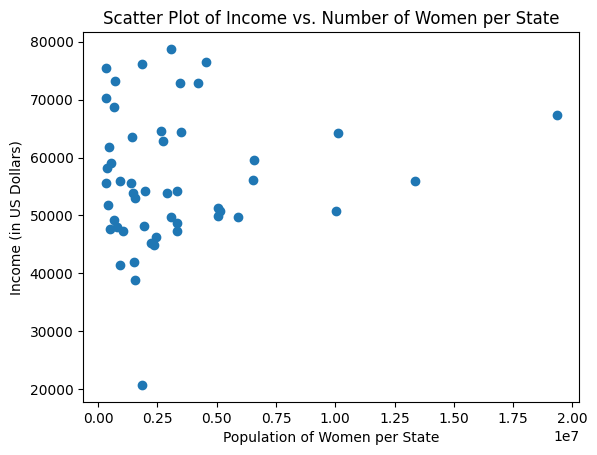

<Figure size 640x480 with 0 Axes>

In [444]:
plt.scatter(us_census['female pop'], us_census['Income'])
plt.title("Scatter Plot of Income vs. Number of Women per State")
plt.xlabel("Population of Women per State")
plt.ylabel("Income (in US Dollars)")
plt.show()
plt.clf()

## Histogram of Races

Looking at columns to see what histograms to plot

In [407]:
us_census.columns

Index(['Unnamed: 0', 'State', 'TotalPop', 'Hispanic', 'White', 'Black',
       'Native', 'Asian', 'Pacific', 'Income', 'GenderPop', 'male pop',
       'female pop'],
      dtype='object')

But data is still not clean yet


In [408]:
# removing % sign from race categories

us_census['Hispanic'] = us_census['Hispanic'].str[:-1]
us_census['White'] = us_census['White'].str[:-1]
us_census['Black'] = us_census['Black'].str[:-1]
us_census['Asian'] = us_census['Asian'].str[:-1]
us_census['Pacific'] = us_census['Pacific'].str[:-1]
us_census['Native'] = us_census['Native'].str[:-1]

#convert data to numerics
races = ['Hispanic', 'White', 'Black', 'Asian', 'Pacific', 'Native', 'Income']
us_census[races] = us_census[races].apply(pd.to_numeric)
us_census.dtypes






Unnamed: 0      int64
State          object
TotalPop        int64
Hispanic      float64
White         float64
Black         float64
Native        float64
Asian         float64
Pacific       float64
Income        float64
GenderPop      object
male pop        int64
female pop    float64
dtype: object

In [421]:
us_census.drop(columns=['Unnamed: 0'], inplace=True)
us_census      

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,male pop,female pop
1,Alaska,733375,5.91,60.91,2.85,16.39,5.45,1.06,70354.74,384160,349215.0
2,Arizona,6641928,29.57,57.12,3.85,4.36,2.88,0.17,54207.82,3299088,3342840.0
3,Arkansas,2958208,6.22,71.14,18.97,0.52,1.14,0.15,41935.63,1451913,1506295.0
4,California,38421464,37.29,40.22,5.68,0.41,13.05,0.35,67264.78,19087135,19334329.0
5,Colorado,5278906,20.78,69.90,3.55,0.57,2.66,NaN,64657.80,2648667,2630239.0
1,Connecticut,3593222,15.60,67.68,10.35,0.13,4.02,0.02,76146.56,1751607,1841615.0
2,Delaware,926454,8.82,64.63,20.74,0.26,3.27,NaN,61827.98,448413,478041.0
3,District of Columbia,647484,9.17,33.10,51.78,0.20,3.38,0.03,75466.36,306674,340810.0
4,Florida,19645772,21.34,59.08,15.17,0.21,2.28,0.05,50690.19,9600009,10045763.0
5,Georgia,10006693,8.42,54.29,32.09,0.19,3.10,0.05,50811.08,4883331,5123362.0


In [440]:
#checking for missing information to see how to deal with it

for component in us_census.columns:
    missing_data = us_census[component].isnull()
    print(set(missing_data))

#we know that only "Pacific" column has null values

#fill null values with the remaining percentage
us_census['Pacific'] = us_census['Pacific'].fillna(100 - us_census['Hispanic'] - us_census['White'] - us_census['Black'] - us_census['Native'] - us_census['Asian'])

#check for duplicates again
us_census = us_census.drop_duplicates(subset = us_census.columns[1:])

us_census



{False}
{False}
{False}
{False}
{False}
{False}
{False}
{False, True}
{False}
{False}
{False}


,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,male pop,female pop
1,Alaska,733375,5.91,60.91,2.85,16.39,5.45,1.06,70354.74,384160,349215.0
2,Arizona,6641928,29.57,57.12,3.85,4.36,2.88,0.17,54207.82,3299088,3342840.0
3,Arkansas,2958208,6.22,71.14,18.97,0.52,1.14,0.15,41935.63,1451913,1506295.0
4,California,38421464,37.29,40.22,5.68,0.41,13.05,0.35,67264.78,19087135,19334329.0
5,Colorado,5278906,20.78,69.90,3.55,0.57,2.66,2.54,64657.80,2648667,2630239.0
1,Connecticut,3593222,15.60,67.68,10.35,0.13,4.02,0.02,76146.56,1751607,1841615.0
2,Delaware,926454,8.82,64.63,20.74,0.26,3.27,2.28,61827.98,448413,478041.0
3,District of Columbia,647484,9.17,33.10,51.78,0.20,3.38,0.03,75466.36,306674,340810.0
4,Florida,19645772,21.34,59.08,15.17,0.21,2.28,0.05,50690.19,9600009,10045763.0
5,Georgia,10006693,8.42,54.29,32.09,0.19,3.10,0.05,50811.08,4883331,5123362.0


## A histogram showing which races are predominantly the majority or minority across the multiple states
##### The portion above 50 percent would be considered the states where the race is majority. Considering the histogram for whites, there are alot of states where the whites are the majority, showing that they are the overall majority in the country.

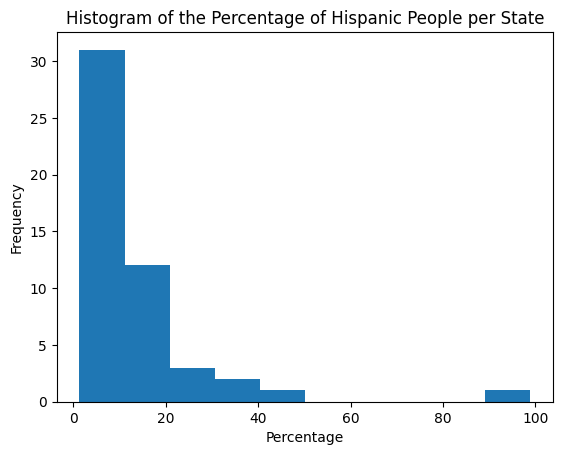

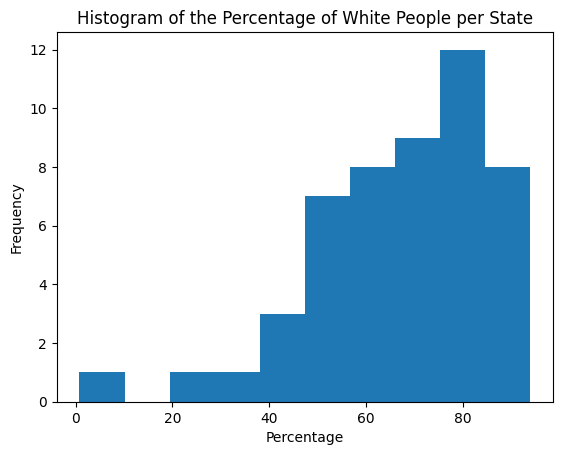

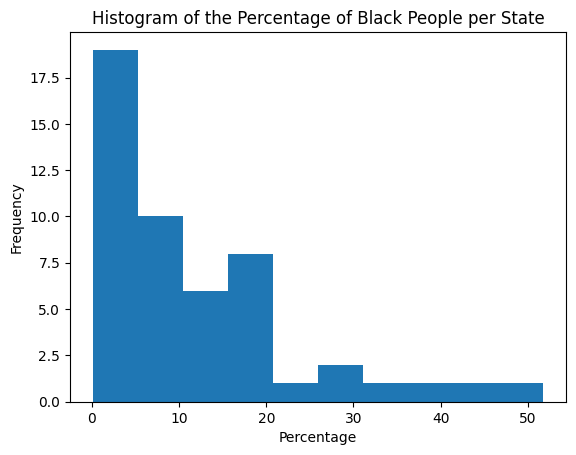

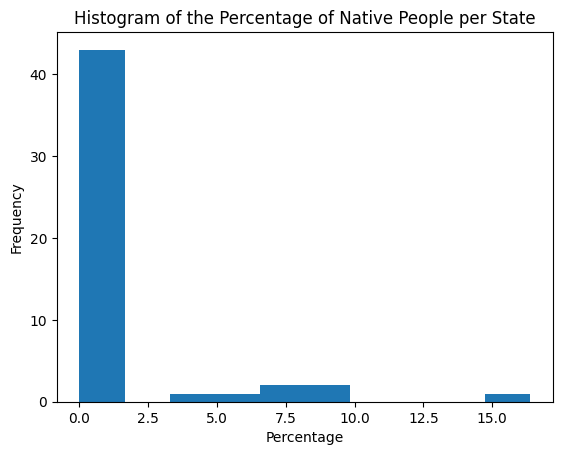

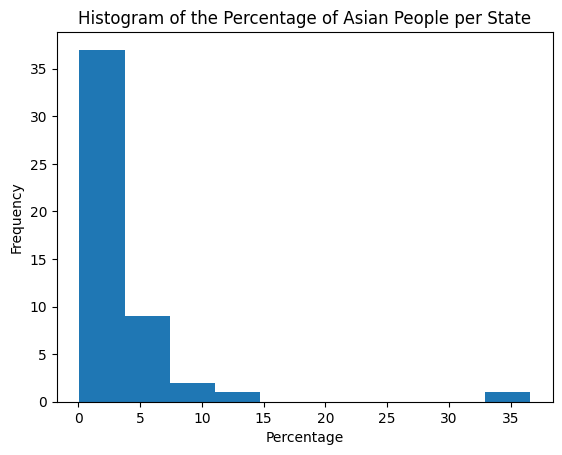

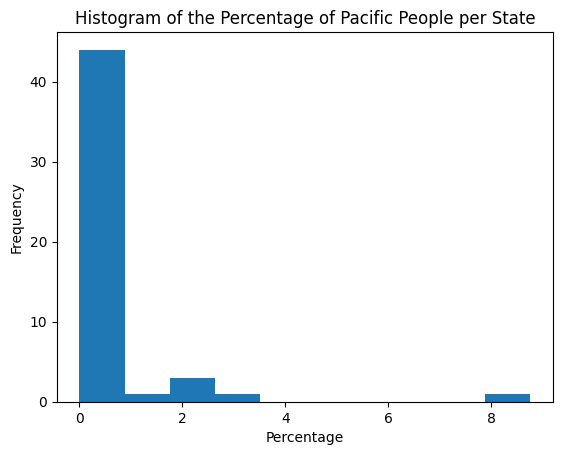

<Figure size 640x480 with 0 Axes>

In [442]:
for race in ['Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific']:
    plt.hist(us_census[race])
    plt.title("Histogram of the Percentage of {} People per State".format(race))
    plt.xlabel("Percentage")
    plt.ylabel("Frequency")
    plt.show()
    plt.clf()